Needed Imports

In [1]:
import tensorflow as tf
import cv2
import json
import numpy as np
from matplotlib import pyplot as plt
import os

## 2. Reviewing data and loading images

2.3 Load images into tensorflow pipeline

In [3]:
# Loading images
images_faces = tf.data.Dataset.list_files('data\\faces\\images_faces\\*.jpg', shuffle=True)

In [4]:
# Check if images are loaded properly
images_faces.as_numpy_iterator().next()

b'data\\faces\\images_faces\\fbae95cb-90ec-11ed-b25c-74e5f916a70f.jpg'

In [5]:
# Creating function to load the images via tensorflow
def load_image(x):
    byte_img = tf.io.read_file(x)
    img = tf.io.decode_jpeg(byte_img)
    return img

In [6]:
# For every image in images do the load_image function
images_faces = images_faces.map(load_image)

In [7]:
# Check if images are decoded
images_faces.as_numpy_iterator().next()

array([[[ 88,  64,  40],
        [ 92,  68,  44],
        [ 99,  73,  50],
        ...,
        [139, 143, 129],
        [139, 143, 128],
        [139, 143, 128]],

       [[ 93,  69,  45],
        [ 96,  72,  48],
        [101,  75,  52],
        ...,
        [137, 141, 127],
        [137, 141, 126],
        [137, 141, 126]],

       [[ 98,  76,  52],
        [102,  80,  56],
        [107,  83,  59],
        ...,
        [140, 144, 130],
        [140, 144, 130],
        [139, 143, 129]],

       ...,

       [[ 73,  93, 128],
        [ 74,  94, 129],
        [ 81, 101, 136],
        ...,
        [100, 117, 169],
        [ 99, 116, 170],
        [102, 119, 171]],

       [[ 75,  95, 130],
        [ 75,  95, 130],
        [ 82, 102, 137],
        ...,
        [ 96, 114, 164],
        [ 93, 113, 164],
        [ 96, 116, 166]],

       [[ 79,  99, 134],
        [ 78,  98, 133],
        [ 86, 106, 141],
        ...,
        [ 94, 112, 162],
        [ 93, 113, 163],
        [ 97, 117, 167]]

In [8]:
# Checking the type
type(images_faces)

tensorflow.python.data.ops.dataset_ops.MapDataset

2.3 View raw images with matplotlib

In [9]:
# Batch images into groups of 4
image_generator = images_faces.batch(4).as_numpy_iterator()

In [12]:
# Get other images every run
plot_images = image_generator.next()

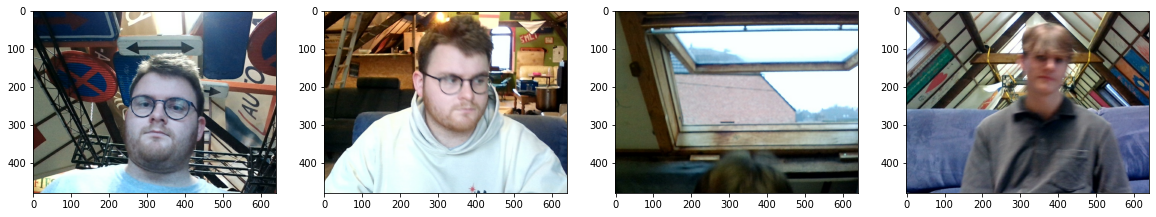

In [13]:
# Plot the images
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, image in enumerate(plot_images):
    ax[idx].imshow(image)
plt.show()

## 3. Partitioning unaugmented data 

3.1 Splitting data into train, test and val MANUALLY

In [24]:
#  Getting amount of images in directory
dir_path = 'data\\faces\\images_faces'
dir_size = len([img for img in os.listdir(dir_path) if os.path.isfile(os.path.join(dir_path, img))])

In [26]:
# Calculating amount of dataset`
# train_faces
print('train faces:', dir_size*0.70) # 137 train
# test_faces
print('test faces:', dir_size*0.15) # 29 test
# val_faces
print('val faces:', dir_size*0.15) # 29 val

train faces: 136.5
test faces: 29.25
val faces: 29.25


Now we first have to move the images (and right amount) to the right directory !!

3.2 Move matching labels

In [28]:
for folder in ['train_faces', 'test_faces', 'val_faces']:
    for file in os.listdir(os.path.join('data', 'faces', folder, 'images')):
        filename = file.split('.')[0]+'.json'
        existing_filepath = os.path.join('data', 'faces', 'labels_faces', filename)
        if os.path.exists(existing_filepath):
            new_filepath = os.path.join('data', 'faces', folder, 'labels', filename)
            os.replace(existing_filepath, new_filepath)